# Titanic Project


# 1. Introduction

The luxury Royal Mail Steamer Titanic sank in the early hours of April 15, 1912, off the coast of Newfoundland in the Atlantic, killing more than 1500 people. The Titanic departed from Southampton, England, on April 10, 1912 and was heading to New York after stops in France and Ireland.

Several factors contributed to the lost of this large number of lives. Among them, the insufficient number of lifeboats for the passengers and crew. In addition, many boats were loaded with fewer people than they could carry. In spite of this, some types of people were more likely to survive than others. For instance, women and children. 

In this assignment, we are going to analyze the characteristics that might have contributed for a particular passenger to survive the disaster.  

# 2. The Data

The data that will be used in this analysis was taken from the kaggle website. We are going to use the file **train.csv** which contains the following variables:

|Variable | Definition | Key |
|---------|------------|-----|
|**survival** |	Survival   |0 = No, 1 = Yes |
|**pclass**   |Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd |
|**Name**     | Name and title| 
|**sex** 	  |Sex 	       |
|**Age** 	  |Age in years| 	
|**sibsp** 	  |# of siblings / spouses aboard the Titanic| 	
|**parch** 	  |# of parents / children aboard the Titanic| 	
|**ticket**   |Ticket number| 	
|**fare** 	  |Passenger fare| 	
|**cabin** 	  |Cabin number|   	
|**embarked** |Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|
Variable Notes

pclass: A proxy for socio-economic status

1st = Upper

2nd = Middle

3rd = Lower

In [1]:
import pandas as pd
from pandas import Series,DataFrame
from pylab import *
import numpy as np
from numpy import nan as NA
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
# Read the file train.csv and convert it into a data frame.
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Checking for the total number of null values per variable
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The numbers above show that only three variables have missing values:  

1) 20% of the records do not have values for **age** 

2) 77% of the records do not have values for the **cabin number**

3) Less then 1% of the records do not have values for the **port of embarkation** 

It is clear that we cannot exclude rows based on the lack of data for the cabin number, otherwise we would end up with a small training sample whcih is probably not representative of the overall set. Age and embarked, on the other hand, might be used to drop entire rows.  

## Creating a new variable called "Title"

In [7]:
# In order to do this we will extract from the variable "Name" the letter preceding a pediod and
# add it to the data frame as a new variable called "Title"
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [8]:
# Checking which and how many unique Titles there are in the file
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Some of the titles above have the same meaning. For instance, **Mme** is the French version of Mrs and **Mlle** is the French version of Miss.  

We could also group **Sir** and **Don** in the same category as Mr.
**Jonkheer** is a title that can be translated as young lord and was used in the Netherlands. We will change this title to Mr as well. 
The same could be assumed for **Lady** and **Countess**: the title of Mrs.

**Ms** is used when the marital status of a woman is irrelevant or unknown. Since there is only one Ms, we will change her title arbitrarialy to Mrs. 

The other titles will be grouped in a new title called **Other**

In [9]:
# Checking the number of people per title
pd.value_counts(df['Title'],dropna=True,sort=False)

Ms            1
Rev           6
Lady          1
Mrs         125
Sir           1
Jonkheer      1
Miss        182
Mme           1
Col           2
Countess      1
Major         2
Master       40
Mlle          2
Don           1
Capt          1
Mr          517
Dr            7
Name: Title, dtype: int64

In [10]:
# Replacing the titles according to the explanation above.
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace(['Mme', 'Lady', 'Countess', 'Ms'], 'Mrs')
df['Title'] = df['Title'].replace(['Don', 'Sir', 'Jonkheer'],'Mr')
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Rev', 'Dr','Major'], 'Other')

In [11]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [12]:
# Count the number of people per title
pd.value_counts(df['Title'],dropna=True,sort=False)

Mrs       129
Miss      184
Master     40
Other      18
Mr        520
Name: Title, dtype: int64

# 3. Exploring the Data

## How many passengers survived the Titanic?

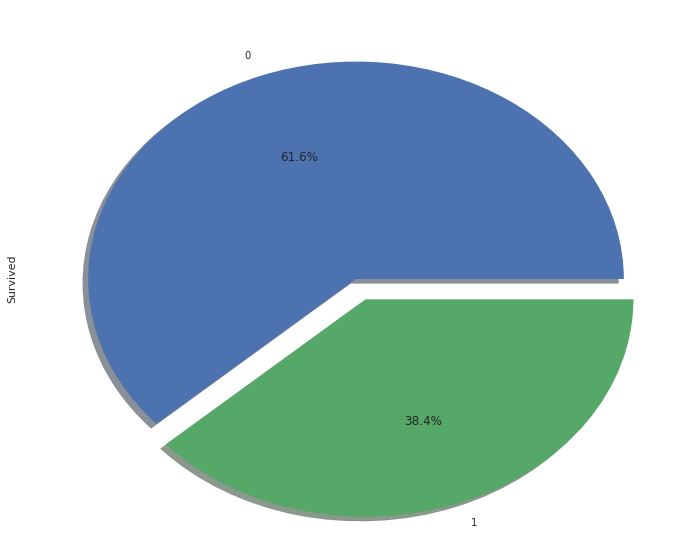

In [13]:
f,ax=plt.subplots(figsize=(12,10))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

The Figures above show the amount of survivors (green) and non-survivors (blue) of the disaster. 342 (~38%) of the training set is composed by survivors and 549 (~ 62%) is composed by non-survivors.

## Sex

In [14]:
# In this section we will explore the survival based on the person's gender. 
# We start separating the population that survived from those that did not survive.
surv   = df.loc[:][df.Survived==1]  # Survived
n_surv = df.loc[:][df.Survived==0]  # Did not survived

surv.describe()
n_surv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [15]:
# Counting the number of survivors and non survivors by sex:
conta_sex_s=pd.value_counts(surv['Sex'],dropna=True,sort=False)   # In both cases we are droping the null values 
conta_sex_ns=pd.value_counts(n_surv['Sex'],dropna=True,sort=False) # of variable "Sex"
conta_sex_ns.index

Index(['female', 'male'], dtype='object')

In [16]:
# Create a not survived Serie
n_surv_s=pd.Series(conta_sex_ns.values,index=conta_sex_ns.index)
# Create a data frame with the survivors 
surv_d=pd.DataFrame(conta_sex_s.values,index=conta_sex_s.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_d['Not Survived']=n_surv_s
surv_d

,Survived,Not Survived
female,233,81
male,109,468


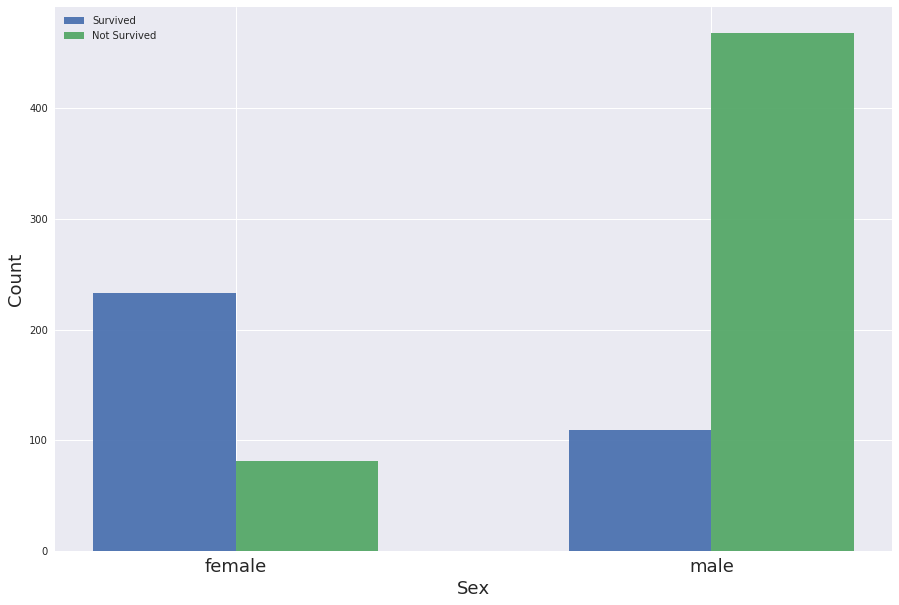

In [17]:
# Plot the number of survivors and non survivors according to the sex.
fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3
objects=list(surv_d.index)
index=np.arange(len(objects))

rects1 = plt.bar(index, surv_d['Survived'], bar_width,alpha=0.95, label='Survived',color='b')
rects2 = plt.bar(index+bar_width, surv_d['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='g')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Sex', fontsize=18)
plt.legend()
plt.show()

There are 577 men (65%) and 314 women (35%) in the training set. 

As expected, the fraction of females (~75%) who survived are much larger than the fraction of males (~20%). 

Among the survivors, 68% were female and 32% were male.    

## Age

As a first approach we will exclude all rows for which the Age is missing.

In [18]:
# Dropping rows that do not have data for the Age variable
surv_c=surv.dropna(subset=['Age'])
n_surv_c=n_surv.dropna(subset=['Age'])
n_surv_c.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.000000
mean,442.299528,0.0,2.485849,30.626179,0.525943,0.365566,22.965456
std,264.739548,0.0,0.743633,14.172110,1.044760,0.878341,31.448825
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,200.750000,0.0,2.000000,21.000000,0.000000,0.000000,7.895800
50%,436.000000,0.0,3.000000,28.000000,0.000000,0.000000,11.887500
75%,683.250000,0.0,3.000000,39.000000,1.000000,0.000000,26.550000
max,891.000000,0.0,3.000000,74.000000,5.000000,6.000000,263.000000


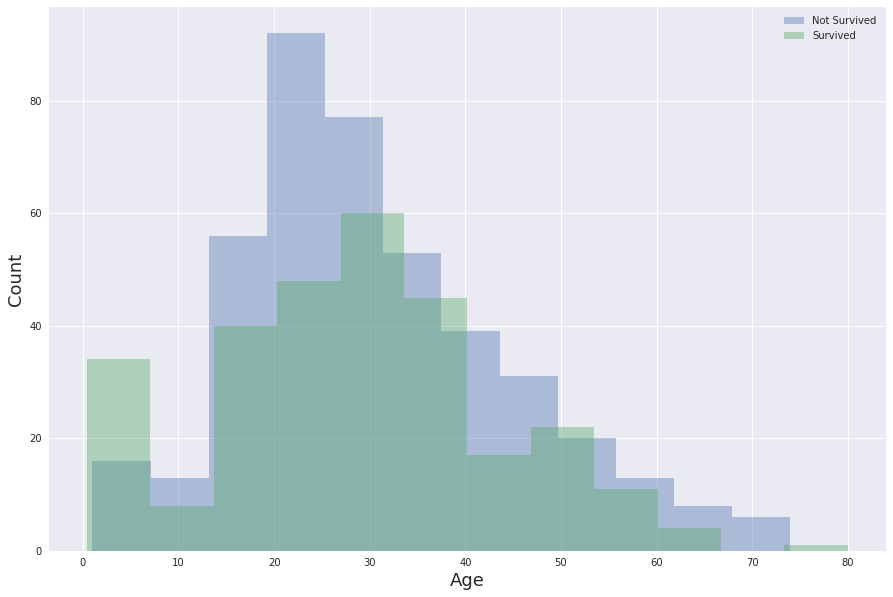

In [19]:
# For the age, we will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(n_surv_c.Age,bins=12, kde=False,label="Not Survived")
sns.distplot(surv_c.Age,bins=12, kde=False,color='g',label="Survived")

plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend()

The plot above shows that, while the majority of non survivors were ~ 25 years old, most survivors were ~ 30 years old. It also shows another pick of survival for children, as expected. For ages around 50 there is a small increase in the fraction of survivors, but not as significant as the pick around age 5.  

In [20]:
# Checking the distribution of ages among survivors and non survivors of different genders
surv_f   = df.loc[:][df.Survived==1][df.Sex=='female']  # Survived
surv_m   = df.loc[:][df.Survived==1][df.Sex=='male']
n_surv_f   = df.loc[:][df.Survived==0][df.Sex=='female']  # Survived
n_surv_m   = df.loc[:][df.Survived==0][df.Sex=='male']
# Dropping the rows that do not have data for the variable age.
surv_cf=surv_f.dropna(subset=['Age'])
surv_cm=surv_m.dropna(subset=['Age'])
n_surv_cf=n_surv_f.dropna(subset=['Age'])
n_surv_cm=n_surv_m.dropna(subset=['Age'])

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


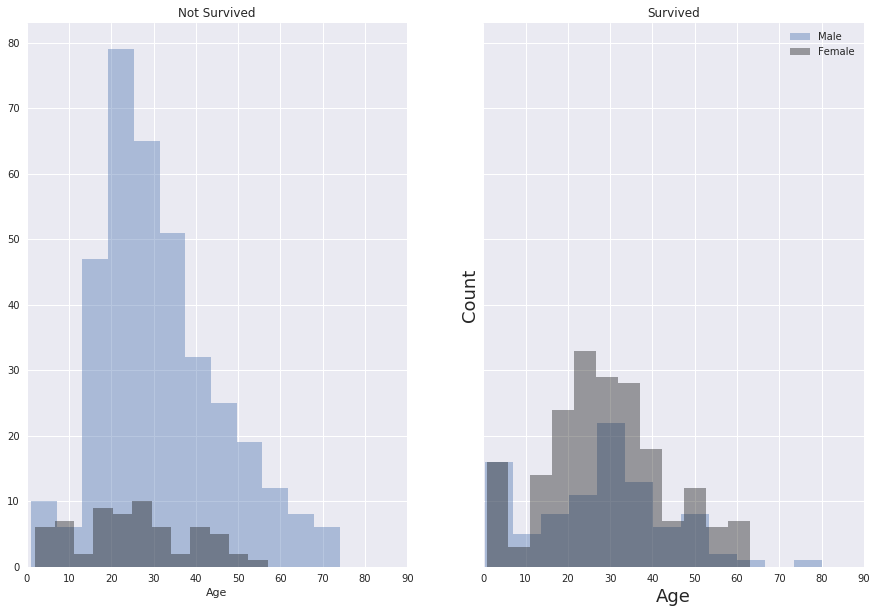

In [21]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(15, 10),sharex=True, sharey=True)
sns.distplot(n_surv_cm.Age,ax=axes[0],bins=12, kde=False,label="Male")
sns.distplot(n_surv_cf.Age,ax=axes[0],bins=12, kde=False,label="Female",color='k')
sns.distplot(surv_cm.Age,ax=axes[1],bins=12, kde=False,label="Male")
sns.distplot(surv_cf.Age,ax=axes[1],bins=12, kde=False,label="Female",color='k')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlim(0,90)
axes[0].set_title('Not Survived')
axes[1].set_title('Survived')
plt.legend()
plt.show()

The Figure on the left-hand side shows the age distributions for females and males who do not survived. 

It appears that the distribution for females has three picks: one for ages smaller than 10, one for ages between 15 and 35 and one for ages between 40 and 50. 

The Figure on the right-hand side shows the age distributions for females and males who survived.

There is a shift in age towards smaller values for the female distribution. In addition, there is a pick in both female and male distribution for ages smaller than 10. 


### What the variable Title can tell us about the ages

In [22]:
# Finding the location for each "Title" using the entire sample
title_mr   = df.loc[:][df.Title=='Mr']
title_ms   = df.loc[:][df.Title=='Miss']
title_mrs   = df.loc[:][df.Title=='Mrs']
title_ma   = df.loc[:][df.Title=='Master']
title_ot   = df.loc[:][df.Title=='Other']

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


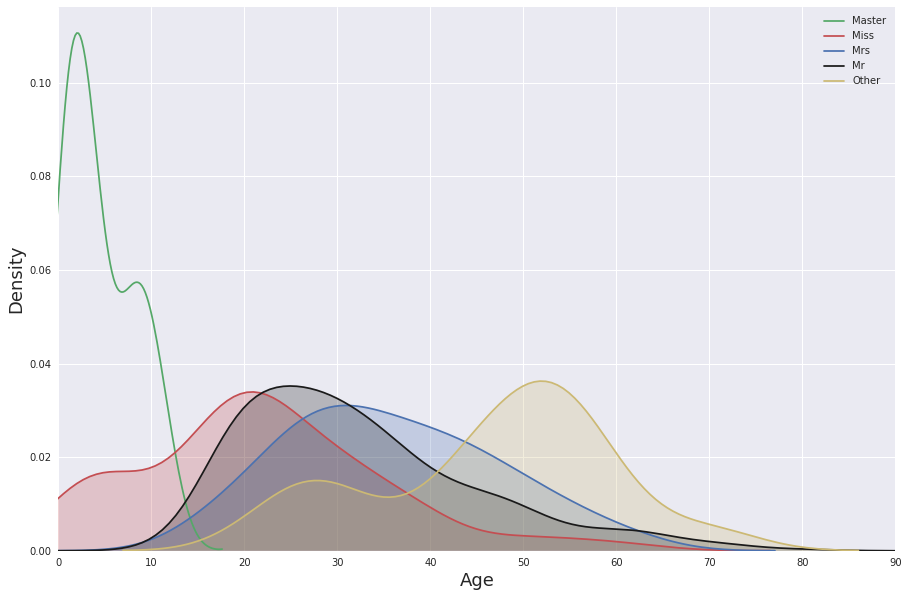

In [23]:
#Plotting the Age distribution per title
f, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(title_ma.Age, shade=False, color='g',legend=True,label="Master")
sns.kdeplot(title_ms.Age, shade=True,color='r',label="Miss")
sns.kdeplot(title_mrs.Age, shade=True,color='b',label="Mrs")
sns.kdeplot(title_mr.Age, shade=True,color='k',label="Mr")
sns.kdeplot(title_ot.Age, shade=True,color='y',label="Other")
plt.xlim(0,90)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.show()

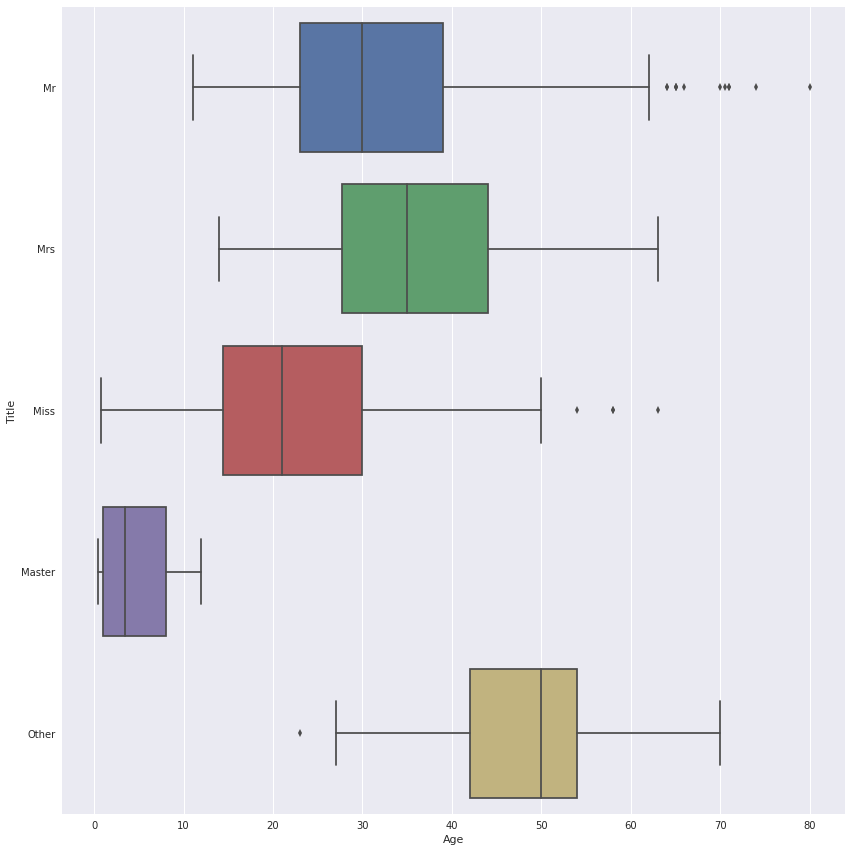

In [24]:
# Box plot with the ages per Title
sns.factorplot('Age','Title',data=df,kind='box',size=12)

It is clear that the distributions are very different among titles. 

Masters are young with ages smaller than 20.

The misses, as expected, are mainly comprised by children and women with ages below 30.

Most married women have ages between 25 and 50.

Most misters have ages smaller than 40.

The title **Other** is comprised by a larger population of older men (age > 40) and a smaller population of men with ages between 20 and 35.  

In the light of the behaviour seen in the two Figures above, one might attemp to introduce a new categorical variable for the ages. 

**Child**: ages below 15

**Young adult**: ages between 15 and 25

**Adult**: ages between 25 and 40

**Senior**: ages above 40

This variable could replace the age variable in the analysis and the title could be used to assign the record that do not have ages to the age class. 

we could train the model in the 2 cases to test whether this new variable would help improve the model:

1) Case one - Exclude rows with missing ages and train the model using the age variable

2) Case two - Assign an age class to the records and use all records to train the model

In [26]:
# Defining the new class based on the age and title: 
def nova_v(data,ar_ou):
    ar_in1=data['Age']
    ar_in2=data['Title']   
    nulo=ar_in1.isnull()
    nulo_a=ar_in1.loc[:][nulo==True]
    for i in range(0,len(ar_in1)):
        if (ar_in1[i] <= 15.0):
            ar_ou.append('child')
        elif (ar_in1[i] > 15.0 and ar_in1[i] <= 25.0):
             ar_ou.append('young adult')
        elif (ar_in1[i] > 25.0 and ar_in1[i] <= 40.0): 
             ar_ou.append('adult')
        elif (ar_in1[i] > 40.0):
             ar_ou.append('senior')
        elif (i in nulo_a and ar_in2[i]=='Master'):
             ar_ou.append('child')
        elif (i in nulo_a and ar_in2[i]=='Mr'):   
             ar_ou.append('adult')
        elif (i in nulo_a and ar_in2[i]=='Miss'):
             ar_ou.append('young adult')
        elif (i in nulo_a and ar_in2[i]=='Mrs'):   
             ar_ou.append('adult')
        elif (i in nulo_a and ar_in2[i]=='Other'):     
             ar_ou.append('senior')
 

In [27]:
# Call the function to define the new class: **Aclass**
dummy=[]
nova_v(df,dummy)

dummy=pd.Series(dummy,index=df.index)
df['Aclass']=dummy.values
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,senior
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,child


In [28]:
# Re-defining the survivors and non survivors frame:
surv   = df.loc[:][df.Survived==1]  # Survived
n_surv = df.loc[:][df.Survived==0]  # Did not survived
surv.describe()
n_surv.describe()
# Counting the number of survivors and non survivors by Age class:
conta_Ac_s=pd.value_counts(surv['Aclass'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_Ac_ns=pd.value_counts(n_surv['Aclass'],dropna=True,sort=False) # of variable "Aclass"
conta_Ac_ns.index

Index(['child', 'senior', 'young adult', 'adult'], dtype='object')

In [29]:
# Create a not survived Serie
n_surv_ac=pd.Series(conta_Ac_ns.values,index=conta_Ac_ns.index)
# Create a data frame with the survivors 
surv_ac=pd.DataFrame(conta_Ac_s.values,index=conta_Ac_s.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_ac['Not Survived']=n_surv_ac
surv_ac
# Sorting in alphabetical order
b = sorted(surv_ac.index)
surv_ac=surv_ac.loc[b]
surv_ac

,Survived,Not Survived
adult,139,260
child,51,36
senior,55,96
young adult,97,157


In can be seen in the Figure below that only the class **child** has more survivors than non survivors.

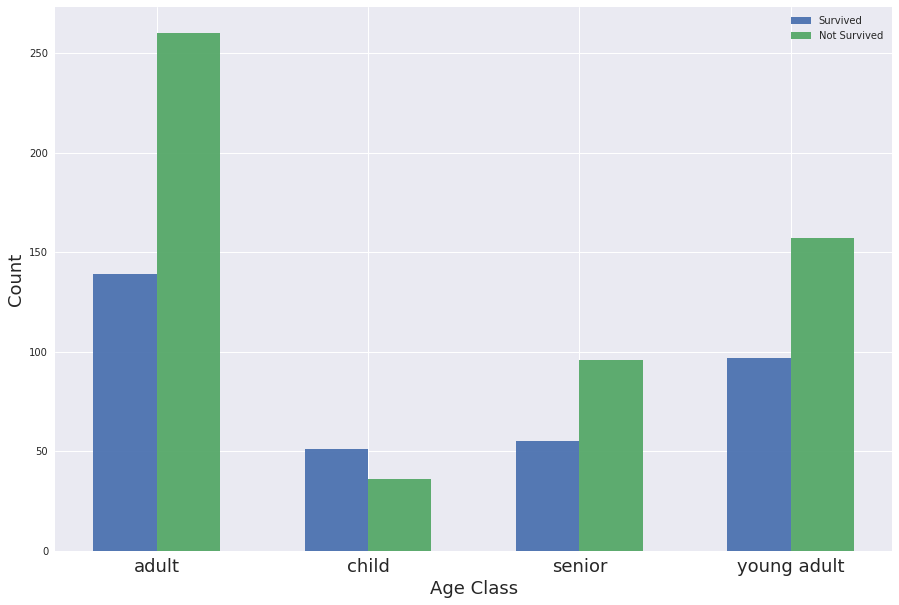

In [30]:
# Plot the number of survivors and non survivors according to the Age class.

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_ac.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_ac['Survived'], bar_width,alpha=0.95, label='Survived',color='b')
rects2 = plt.bar(index+bar_width, surv_ac['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='g')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Age Class', fontsize=18)
plt.legend()
plt.show()


In [31]:
# Checking the distribution of ages among survivors and non survivors of different genders
surv_f   = df.loc[:][df.Survived==1][df.Sex=='female']  # Survived
surv_m   = df.loc[:][df.Survived==1][df.Sex=='male']
n_surv_f   = df.loc[:][df.Survived==0][df.Sex=='female']  # Survived
n_surv_m   = df.loc[:][df.Survived==0][df.Sex=='male']

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [32]:
# Counting the number of survivors and non survivors by age class:
conta_Ac_sf=pd.value_counts(surv_f['Aclass'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_Ac_nsf=pd.value_counts(n_surv_f['Aclass'],dropna=True,sort=False) # of variable "Pclass"
conta_Ac_sm=pd.value_counts(surv_m['Aclass'],dropna=True,sort=False)    
conta_Ac_nsm=pd.value_counts(n_surv_m['Aclass'],dropna=True,sort=False) 
conta_Ac_nsf.index

Index(['senior', 'child', 'young adult', 'adult'], dtype='object')

In [33]:
# Create not survived Series
n_surv_ac_f=pd.Series(conta_Ac_nsf.values,index=conta_Ac_nsf.index)
n_surv_ac_m=pd.Series(conta_Ac_nsm.values,index=conta_Ac_nsm.index)
# Create a data frame with the survivors 
surv_acf=pd.DataFrame(conta_Ac_sf.values,index=conta_Ac_sf.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_acf['Not Survived']=n_surv_ac_f
# Create a data frame with the survivors 
surv_acm=pd.DataFrame(conta_Ac_sm.values,index=conta_Ac_sm.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_acm['Not Survived']=n_surv_ac_m
surv_acf
# Sorting in alphabetical order
b = sorted(surv_acm.index)
surv_acm=surv_acm.loc[b]
surv_acm
b = sorted(surv_acf.index)
surv_acf=surv_acf.loc[b]
surv_acf

,Survived,Not Survived
adult,87,21
child,28,15
senior,37,11
young adult,81,34


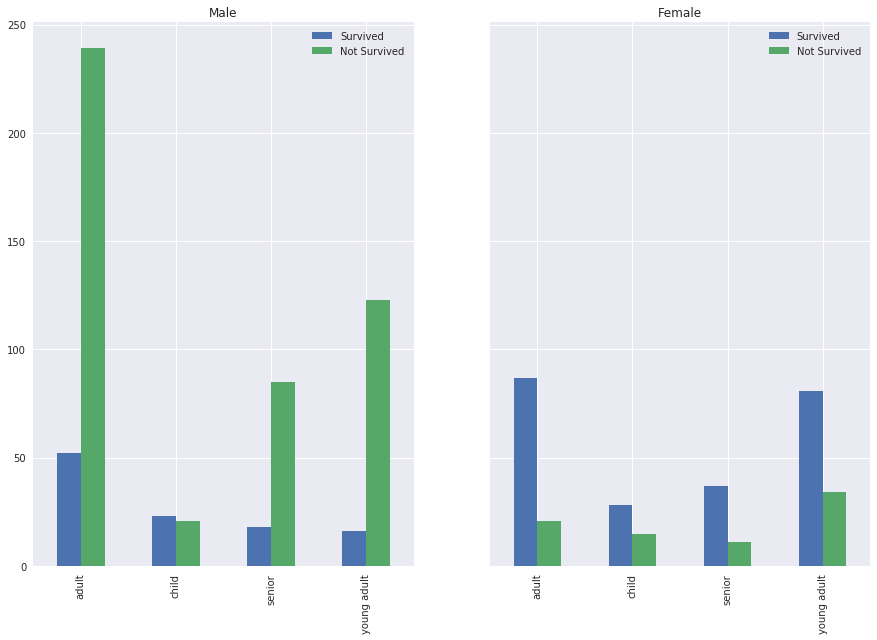

In [34]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(15, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Age class.
surv_acm.plot.bar(figsize=(15, 10),ax=axes[0])
surv_acf.plot.bar(figsize=(15, 10),ax=axes[1])
plt.ylabel('Count', fontsize=18)
axes[0].set_title('Male')
axes[1].set_title('Female')
plt.legend()
plt.show()

The Figures above shows that, even though being a child has its advantages, being a woman is always more advantageous, since their survival will be less dependent on the ages. 

## Social Class

In [35]:
# Counting the number of survivors and non survivors by social class:
conta_Pc_s=pd.value_counts(surv['Pclass'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_Pc_ns=pd.value_counts(n_surv['Pclass'],dropna=True,sort=False) # of variable "Pclass"
conta_Pc_ns.index

Int64Index([1, 2, 3], dtype='int64')

In [36]:
# Create a not survived Serie
n_surv_pc=pd.Series(conta_Pc_ns.values,index=conta_Pc_ns.index)
# Create a data frame with the survivors 
surv_pc=pd.DataFrame(conta_Pc_s.values,index=conta_Pc_s.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_pc['Not Survived']=n_surv_pc
surv_pc

,Survived,Not Survived
1,136,80
2,87,97
3,119,372


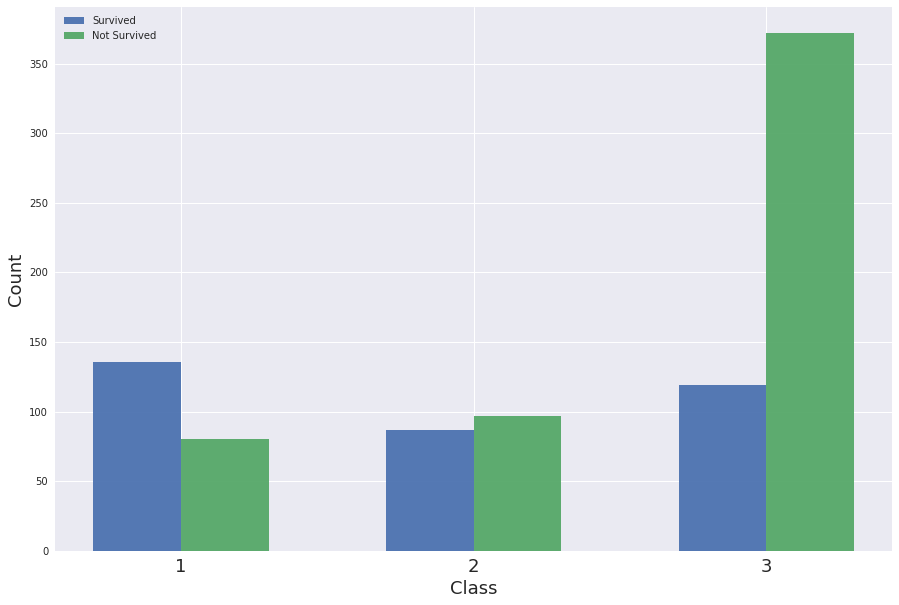

In [37]:
# Plot the number of survivors and non survivors according to the Social class.
fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_pc.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_pc['Survived'], bar_width,alpha=0.95, label='Survived',color='b')
rects2 = plt.bar(index+bar_width, surv_pc['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='g')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Class', fontsize=18)
plt.legend()
plt.show()


Not surprisingly, only first class passengers have more survivors than non survivors. This is possible, not only, because they had special treatment, but also because the cabins for the second and third class were closer to the bottom of the ship as can be seen in the Figure below:

![title](1428232264413.png)

It is a pitty that most records do not show the cabin number. We could expect a correlation between the deck in which the cabin was and the survival, since the collision happened at night when most passengers were sleeping. 

In [38]:
# Checking the distribution of ages among survivors and non survivors of different genders
surv_f   = df.loc[:][df.Survived==1][df.Sex=='female']  # Survived
surv_m   = df.loc[:][df.Survived==1][df.Sex=='male']
n_surv_f   = df.loc[:][df.Survived==0][df.Sex=='female']  # Survived
n_surv_m   = df.loc[:][df.Survived==0][df.Sex=='male']

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [39]:
# Counting the number of survivors and non survivors by social class:
conta_Pc_sf=pd.value_counts(surv_f['Pclass'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_Pc_nsf=pd.value_counts(n_surv_f['Pclass'],dropna=True,sort=False) # of variable "Pclass"
conta_Pc_sm=pd.value_counts(surv_m['Pclass'],dropna=True,sort=False)    
conta_Pc_nsm=pd.value_counts(n_surv_m['Pclass'],dropna=True,sort=False) 
conta_Pc_nsf.index

Int64Index([1, 2, 3], dtype='int64')

In [40]:
# Create not survived Series
n_surv_pc_f=pd.Series(conta_Pc_nsf.values,index=conta_Pc_nsf.index)
n_surv_pc_m=pd.Series(conta_Pc_nsm.values,index=conta_Pc_nsm.index)
# Create a data frame with the survivors 
surv_pcf=pd.DataFrame(conta_Pc_sf.values,index=conta_Pc_sf.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_pcf['Not Survived']=n_surv_pc_f
# Create a data frame with the survivors 
surv_pcm=pd.DataFrame(conta_Pc_sm.values,index=conta_Pc_sm.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_pcm['Not Survived']=n_surv_pc_m
surv_pcf

,Survived,Not Survived
1,91,3
2,70,6
3,72,72


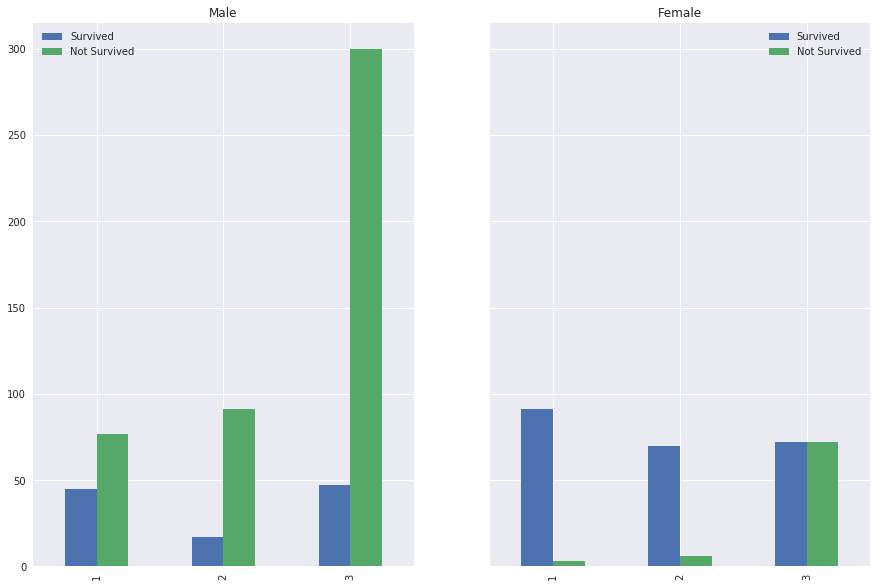

In [41]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(15, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Social class.
surv_pcm.plot.bar(figsize=(15, 10),ax=axes[0])
surv_pcf.plot.bar(figsize=(15, 10),ax=axes[1])
plt.ylabel('Count', fontsize=18)
axes[0].set_title('Male')
axes[1].set_title('Female')
plt.legend()
plt.show()

The Figure above shows an interesting result: The majority of the women who died belonged to the third class.  

## Family Size

In [42]:
# Counting the number of survivors and non survivors by number of siblings or spouse:
conta_Si_s=pd.value_counts(surv['SibSp'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_Si_ns=pd.value_counts(n_surv['SibSp'],dropna=True,sort=False) # of variable "SibSp"
conta_Si_s.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [43]:
# Create a survived Serie
surv_si=pd.Series(conta_Si_s.values,index=conta_Si_s.index)
# Create a data frame with the non survivors 
n_surv_si=pd.DataFrame(conta_Si_ns.values,index=conta_Si_ns.index,columns=['Not Survived'])
# Add the survived values to the data frame 
n_surv_si['Survived']=surv_si
n_surv_si

,Not Survived,Survived
0,398,210.0
1,97,112.0
2,15,13.0
3,12,4.0
4,15,3.0
5,5,NaN
8,7,NaN


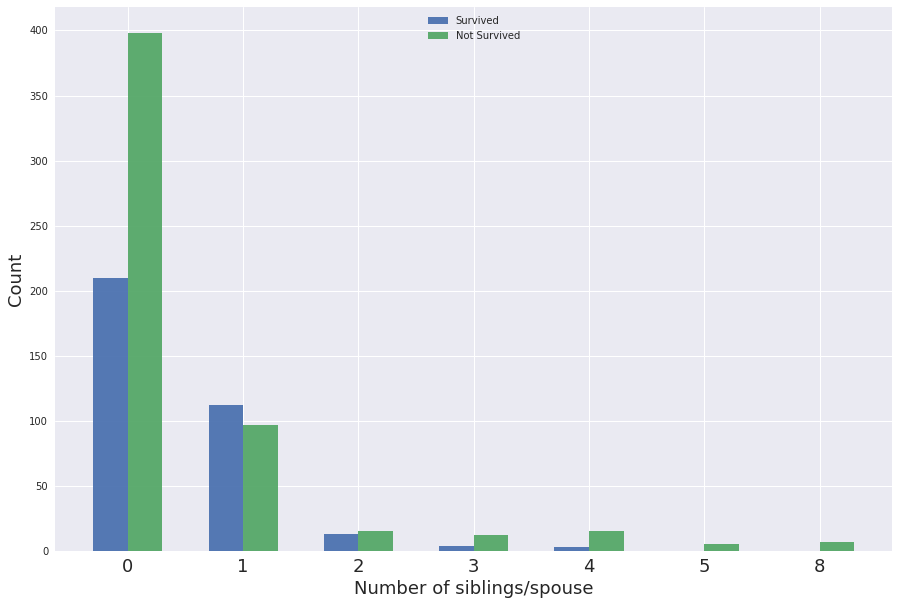

In [44]:
# Plot the number of survivors and non survivors according to the number of siblings or spouse.
fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(n_surv_si.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, n_surv_si['Survived'], bar_width,alpha=0.95, label='Survived',color='b')
rects2 = plt.bar(index+bar_width, n_surv_si['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='g')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Number of siblings/spouse', fontsize=18)
plt.legend()
plt.show()

Only the people accompanied by one sibling or spouse have the number of survivors larger than the number of  non survivors. 

In [45]:
# Counting the number of survivors and non survivors by number of parents or children:
conta_Pa_s=pd.value_counts(surv['Parch'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_Pa_ns=pd.value_counts(n_surv['Parch'],dropna=True,sort=False) # of variable "Parch"
conta_Pa_s.index

Int64Index([0, 1, 2, 3, 5], dtype='int64')

In [46]:
# Create a survived Serie
surv_pa=pd.Series(conta_Pa_s.values,index=conta_Pa_s.index)
# Create a data frame with the non survivors 
n_surv_pa=pd.DataFrame(conta_Pa_ns.values,index=conta_Pa_ns.index,columns=['Not Survived'])
# Add the survived values to the data frame 
n_surv_pa['Survived']=surv_pa
n_surv_pa

,Not Survived,Survived
0,445,233.0
1,53,65.0
2,40,40.0
3,2,3.0
4,4,NaN
5,4,1.0
6,1,NaN


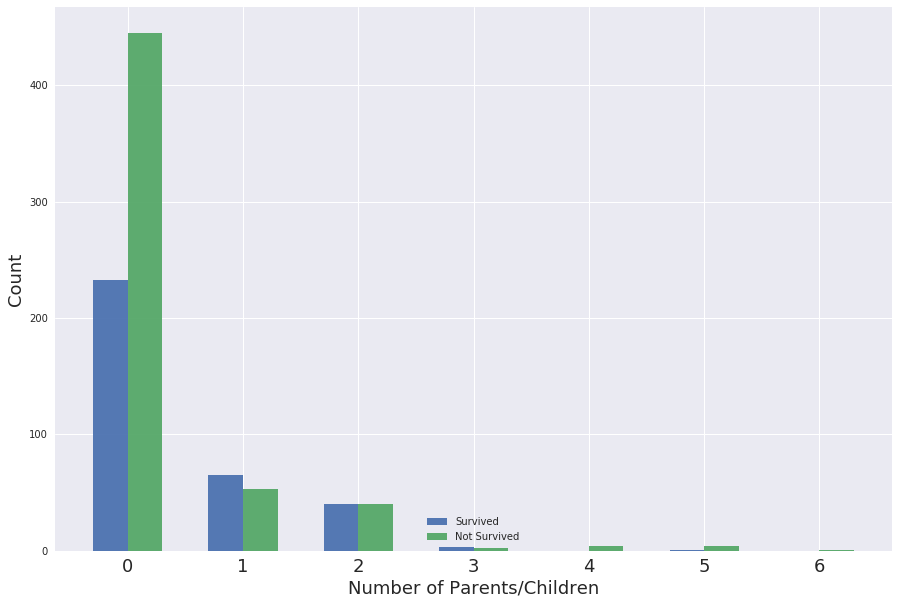

In [47]:
# Plot the number of survivors and non survivors according to the number of parents or children.
fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(n_surv_pa.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, n_surv_pa['Survived'], bar_width,alpha=0.95, label='Survived',color='b')
rects2 = plt.bar(index+bar_width, n_surv_pa['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='g')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Number of Parents/Children', fontsize=18)
plt.legend()
plt.show()

As in the case of siblings and spouses, only people accompanied by one parent or child have the number of survivors larger than the number of non survivors.

We can determine family size by combining the number of siblings or spouses and the number of parents or children.

In [48]:
# Create new variable Fsize
df['Fsize'] = df['SibSp']+df['Parch'] 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,adult,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,senior,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,adult,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,child,1


In [49]:
pd.value_counts(df['Fsize'],dropna=True,sort=False)

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Fsize, dtype: int64

Define a new class called family that follows the rule:

Fsize = 0 --> Family = alone

Fsize = 1 --> Family = couple

Fsize = 2 --> Family = small family

Fsize >=3 --> Family = large family

In [50]:
# Defining the new class based on Fsize: 
def nova_v2(data,ar_ou):
    ar_in1=data['Fsize']
    nulo=ar_in1.isnull()
    nulo_a=ar_in1.loc[:][nulo==True]
    for i in range(0,len(ar_in1)):
        if (ar_in1[i] < 1):
            ar_ou.append('alone')
        elif (ar_in1[i] > 0 and ar_in1[i] < 2):
             ar_ou.append('couple')
        elif (ar_in1[i] > 1 and ar_in1[i] < 3): 
             ar_ou.append('small family')
        elif (ar_in1[i] >= 3):
             ar_ou.append('large family')


In [51]:
# Call the function to define the new class: **Family**
dummy=[]
nova_v2(df,dummy)

dummy=pd.Series(dummy,index=df.index)
df['Family']=dummy.values
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass,Fsize,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult,1,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1,couple
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0,alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,adult,0,alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,senior,0,alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,child,4,large family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,adult,2,small family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,child,1,couple


In [52]:
# Re-defining the survivors and non survivors frame:
surv   = df.loc[:][df.Survived==1]  # Survived
n_surv = df.loc[:][df.Survived==0]  # Did not survived
surv.describe()
n_surv.describe()
# Counting the number of survivors and non survivors by Family type:
conta_F_s=pd.value_counts(surv['Family'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_F_ns=pd.value_counts(n_surv['Family'],dropna=True,sort=False) # of variable "Family"
conta_F_ns.index

Index(['couple', 'large family', 'alone', 'small family'], dtype='object')

In [53]:
# Create a not survived Serie
n_surv_fs=pd.Series(conta_F_ns.values,index=conta_F_ns.index)
# Create a data frame with the survivors 
surv_fs=pd.DataFrame(conta_F_s.values,index=conta_F_s.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_fs['Not Survived']=n_surv_fs
surv_fs
#sorting in alphabetic order
b = sorted(surv_fs.index)
surv_fs=surv_fs.loc[b]
surv_fs

,Survived,Not Survived
alone,163,374
couple,89,72
large family,31,60
small family,59,43


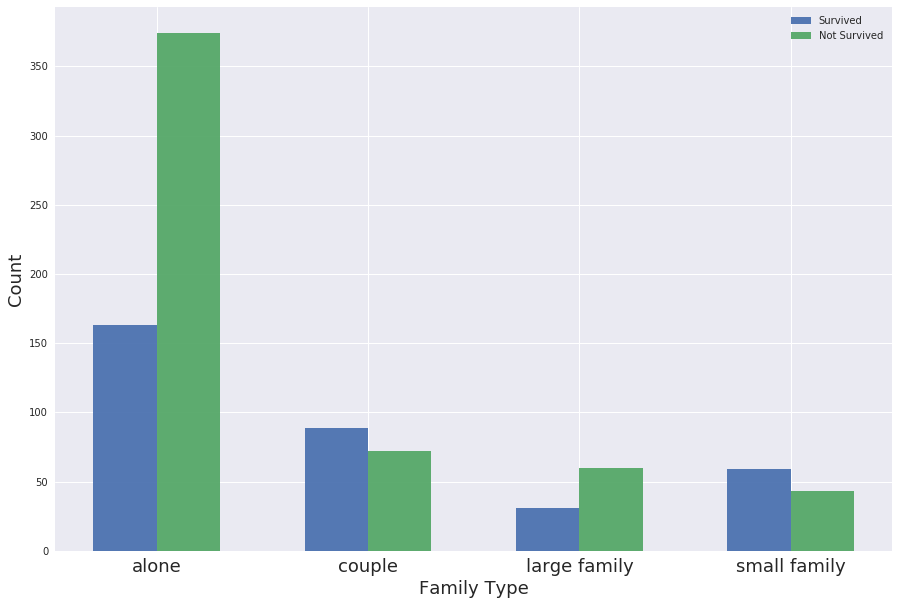

In [54]:
# Plot the number of survivors and non survivors according to the Family type.

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_fs.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_fs['Survived'], bar_width,alpha=0.95, label='Survived',color='b')
rects2 = plt.bar(index+bar_width, surv_fs['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='g')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Family Type', fontsize=18)
plt.legend()
plt.show()


In [55]:
# Checking the distribution of ages among survivors and non survivors of different genders
surv_f   = df.loc[:][df.Survived==1][df.Sex=='female']  # Survived
surv_m   = df.loc[:][df.Survived==1][df.Sex=='male']
n_surv_f   = df.loc[:][df.Survived==0][df.Sex=='female']  # Survived
n_surv_m   = df.loc[:][df.Survived==0][df.Sex=='male']

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [56]:
# Counting the number of survivors and non survivors by Family Type:
conta_fs_sf=pd.value_counts(surv_f['Family'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_fs_nsf=pd.value_counts(n_surv_f['Family'],dropna=True,sort=False) # of variable "Family"
conta_fs_sm=pd.value_counts(surv_m['Family'],dropna=True,sort=False)    
conta_fs_nsm=pd.value_counts(n_surv_m['Family'],dropna=True,sort=False) 
conta_fs_nsf.index

Index(['small family', 'couple', 'large family', 'alone'], dtype='object')

In [57]:
# Create not survived Series
n_surv_fs_f=pd.Series(conta_fs_nsf.values,index=conta_fs_nsf.index)
n_surv_fs_m=pd.Series(conta_fs_nsm.values,index=conta_fs_nsm.index)
# Create a data frame with the survivors 
surv_fsf=pd.DataFrame(conta_fs_sf.values,index=conta_fs_sf.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_fsf['Not Survived']=n_surv_fs_f
# Create a data frame with the survivors 
surv_fsm=pd.DataFrame(conta_fs_sm.values,index=conta_fs_sm.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_fsm['Not Survived']=n_surv_fs_m
surv_fsf
#Sorting in alphabetic order
b = sorted(surv_fsm.index)
surv_fsm=surv_fsm.loc[b]
surv_fsm
b = sorted(surv_fsf.index)
surv_fsf=surv_fsf.loc[b]
surv_fsf

,Survived,Not Survived
alone,99,27
couple,71,16
large family,25,27
small family,38,11


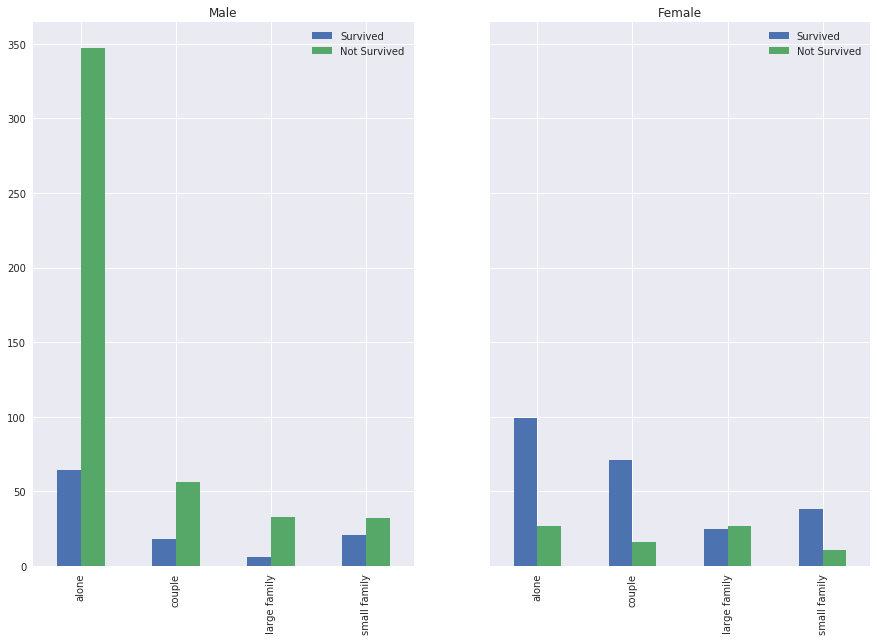

In [58]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(15, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Family Type.
surv_fsm.plot.bar(figsize=(15, 10),ax=axes[0])
surv_fsf.plot.bar(figsize=(15, 10),ax=axes[1])
plt.ylabel('Count', fontsize=18)
axes[0].set_title('Male')
axes[1].set_title('Female')
plt.legend()
plt.show()

The Figures above show the number of survivors and non-survivors for each family type. Most men in large families did not survive the disaster. 

## Port of Embarkation

In [59]:
# Counting the number of survivors and non survivors by port of embarkation:
conta_Em_s=pd.value_counts(surv['Embarked'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_Em_ns=pd.value_counts(n_surv['Embarked'],dropna=True,sort=False) # of variable "SibSp"
conta_Em_s.index

Index(['S', 'Q', 'C'], dtype='object')

In [60]:
# Create a not survived Serie
n_surv_em=pd.Series(conta_Em_ns.values,index=conta_Em_ns.index)
# Create a data frame with the survivors 
surv_em=pd.DataFrame(conta_Em_s.values,index=conta_Em_s.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_em['Not Survived']=n_surv_em
surv_em
#Sorting in alphabetic order
b = sorted(surv_em.index)
surv_em=surv_em.loc[b]
surv_em

,Survived,Not Survived
C,93,75
Q,30,47
S,217,427


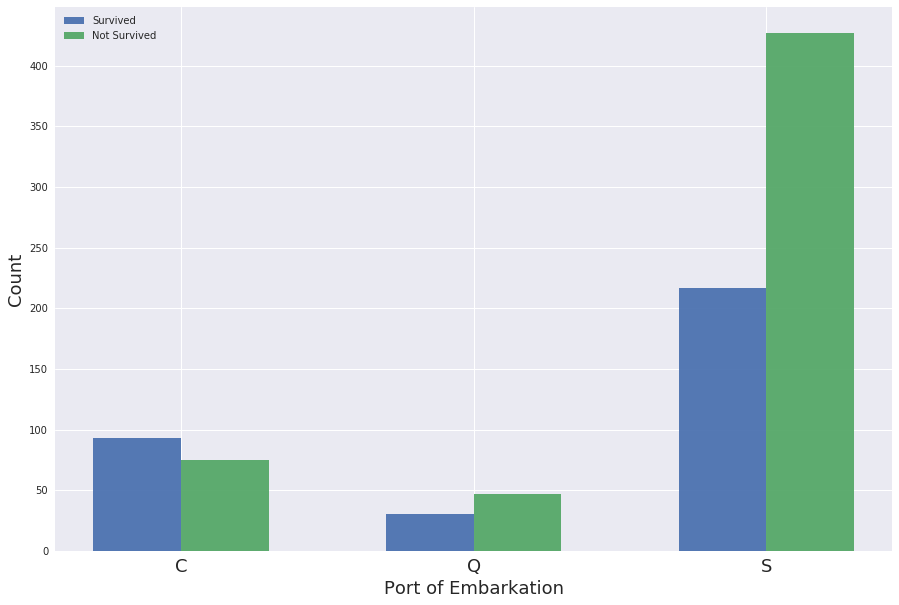

In [61]:
# Plot the number of survivors and non survivors according to the port of Embarkation.

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_em.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_em['Survived'], bar_width,alpha=0.95, label='Survived',color='b')
rects2 = plt.bar(index+bar_width, surv_em['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='g')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Port of Embarkation', fontsize=18)
plt.legend()
plt.show()

In [62]:
# Counting the number of survivors and non survivors by Port of Embarkation:
conta_em_sf=pd.value_counts(surv_f['Embarked'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_em_nsf=pd.value_counts(n_surv_f['Embarked'],dropna=True,sort=False) # of variable "Embarked"
conta_em_sm=pd.value_counts(surv_m['Embarked'],dropna=True,sort=False)    
conta_em_nsm=pd.value_counts(n_surv_m['Embarked'],dropna=True,sort=False) 
conta_em_nsf.index

Index(['Q', 'S', 'C'], dtype='object')

In [63]:
n_surv_em_f=pd.Series(conta_em_nsf.values,index=conta_em_nsf.index)
n_surv_em_m=pd.Series(conta_em_nsm.values,index=conta_em_nsm.index)
# Create a data frame with the survivors 
surv_emf=pd.DataFrame(conta_em_sf.values,index=conta_em_sf.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_emf['Not Survived']=n_surv_em_f
# Create a data frame with the survivors 
surv_emm=pd.DataFrame(conta_em_sm.values,index=conta_em_sm.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_emm['Not Survived']=n_surv_em_m
surv_emf
# Sorting in alphabetic order
b = sorted(surv_emm.index)
surv_emm=surv_emm.loc[b]
surv_emm
b = sorted(surv_emf.index)
surv_emf=surv_emf.loc[b]
surv_emf

,Survived,Not Survived
C,64,9
Q,27,9
S,140,63


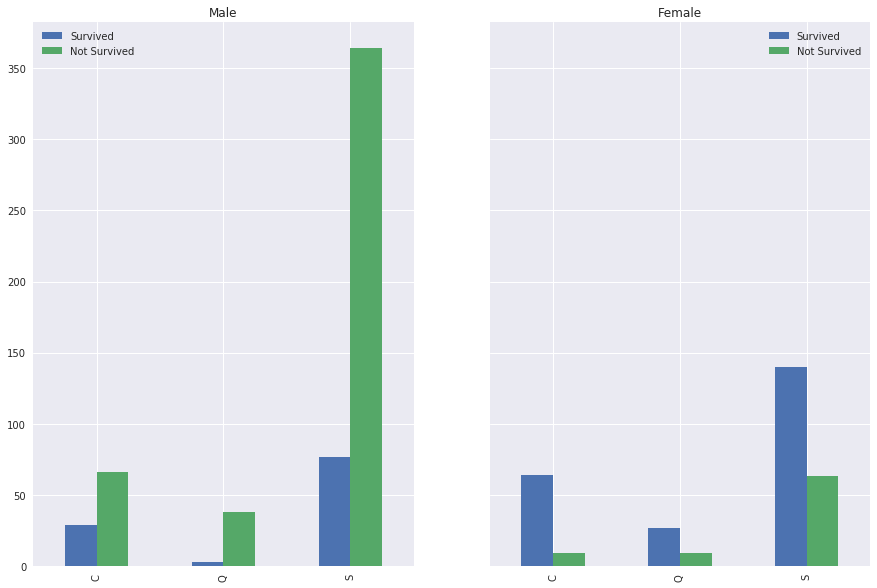

In [64]:
# Plotting the Distributions:
fig,axes=plt.subplots(1,2,figsize=(15, 10),sharey=True)
# Plot the number of survivors and non survivors according to the Port of Embarkation.
surv_emm.plot.bar(figsize=(15, 10),ax=axes[0])
surv_emf.plot.bar(figsize=(15, 10),ax=axes[1])
plt.ylabel('Count', fontsize=18)
axes[0].set_title('Male')
axes[1].set_title('Female')
plt.legend()
plt.show()

## Deck

The cabin variable is composed by a letter and a number. The letter indicates the deck where the cabin is located. 

Even though there is information about the cabin for ~20% of the cabins, we will create a new variable deck based on cabin to check if there is any interesting pattern. 

In [65]:
# In order to do this we will extract from the variable "Cabin" the letter preceding a pediod and
# add it to the data frame as a new variable called "Deck"
df['Deck'] = df.Cabin.str.extract('([A-Za-z])', expand=False) 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Aclass,Fsize,Family,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adult,1,couple,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1,couple,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0,alone,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1,couple,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0,alone,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,adult,0,alone,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,senior,0,alone,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,child,4,large family,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,adult,2,small family,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,child,1,couple,NaN


In [66]:
# Re-defining the survivors and non survivors frame:
surv   = df.loc[:][df.Survived==1]  # Survived
n_surv = df.loc[:][df.Survived==0]  # Did not survived
surv.describe()
n_surv.describe()
# Counting the number of survivors and non survivors by Deck:
conta_dc_s=pd.value_counts(surv['Deck'],dropna=True,sort=False)    # In both cases we are droping the null values 
conta_dc_ns=pd.value_counts(n_surv['Deck'],dropna=True,sort=False) # of variable "Deck"
conta_dc_ns.index

Index(['T', 'F', 'G', 'D', 'E', 'A', 'B', 'C'], dtype='object')

In [67]:
# Create a not survived Serie
n_surv_dc=pd.Series(conta_dc_ns.values,index=conta_dc_ns.index)
# Create a data frame with the survivors 
surv_dc=pd.DataFrame(conta_dc_s.values,index=conta_dc_s.index,columns=['Survived'])
# Add the not survived values to the data frame 
surv_dc['Not Survived']=n_surv_dc
surv_dc
# Sorting in alphabetical order
b = sorted(surv_dc.index)
surv_dc=surv_dc.loc[b]
surv_dc

,Survived,Not Survived
A,7,8
B,35,12
C,35,24
D,25,8
E,24,8
F,8,5
G,2,2


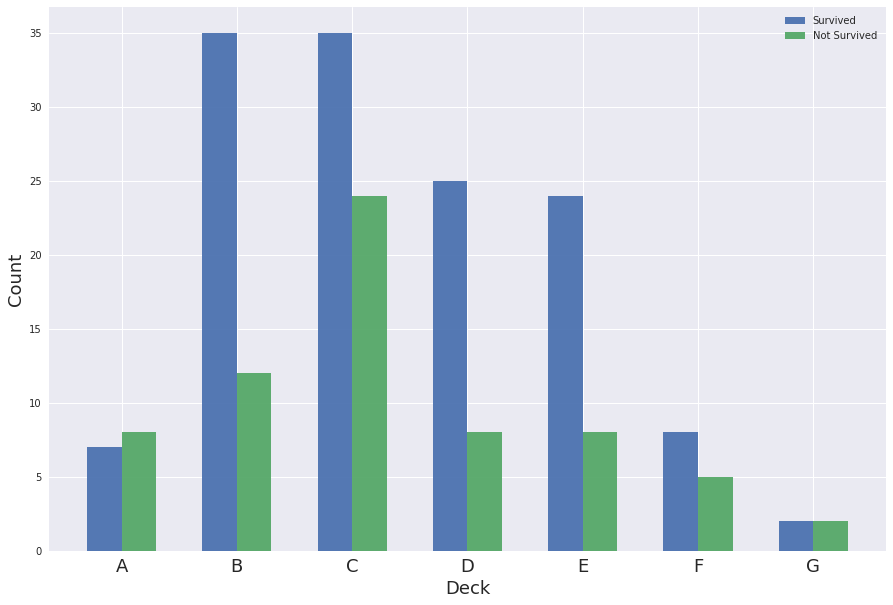

In [68]:
# Plot the number of survivors and non survivors according to the Deck.

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.3

objects=list(surv_dc.index)
index = np.arange(len(objects))

rects1 = plt.bar(index, surv_dc['Survived'], bar_width,alpha=0.95, label='Survived',color='b')
rects2 = plt.bar(index+bar_width, surv_dc['Not Survived'], bar_width,alpha=0.95, label='Not Survived',color='g')


plt.xticks(index + 0.15, objects,fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Deck', fontsize=18)
plt.legend()
plt.show()


The Figure above shows no dependence of survival with the cabin number. This lack of dependence is the result of an incomplete sample, since only 20% of the sample has this information. Furthermore, 67% of the rows containing the cabin number are from survivors which is the opposite proportion of the entire sample that contains 62% of non-survivors. This means that any conclusion drawn from this small sample is most likely incorrect.  